*Data Science Course - Telkom Digital Talent Incubator*

---

# **Regression**
Analisa penjualan pie (pie_sales) berdasarkan price dan advertising.

# Pie Sales Prediction with Regression

In [33]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [34]:
# Pie Sales
# Import Dataset
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie.head()

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0


### Exploratory Data Analysis

In [35]:
# Exploratory data analysis
df_pie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week         15 non-null     int64  
 1   pie_sales    15 non-null     int64  
 2   price        15 non-null     float64
 3   advertising  15 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 608.0 bytes


In [36]:
# cek korelasi
df_pie.corr()['pie_sales'].sort_values(ascending=False)

pie_sales      1.000000
advertising    0.556320
week          -0.067887
price         -0.443273
Name: pie_sales, dtype: float64

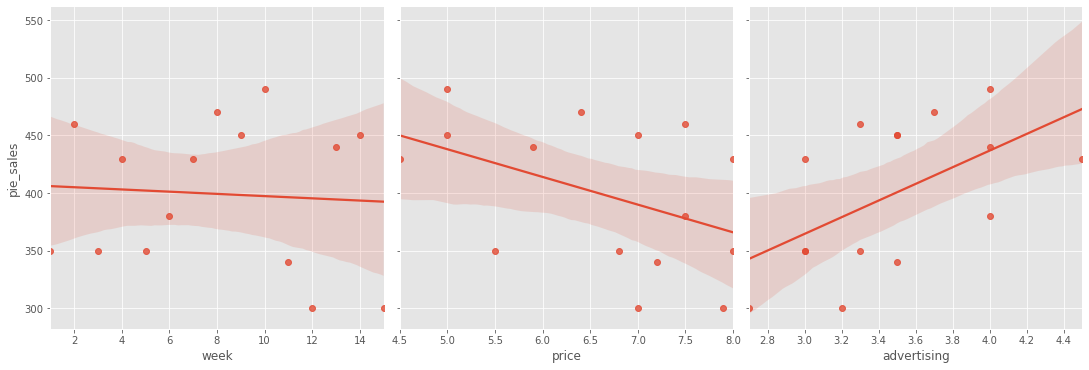

In [37]:
g = sns.PairGrid(df_pie, y_vars=["pie_sales"], x_vars=["week", "price","advertising"], height=5)
g.map(sns.regplot)

Dari gambar diatas dapat disimpulkan bahwa week dan price memiliki korelasi yang cenderung negatif, dan advertising memiliki korelasi cenderung positif terhadap pie_sales. 

Namun karena week adalah variabel time series yang artinya tidak dapat dikendalikan. Maka week tidak akan dimasukkan sebagai feature dalam model.

### Linear Model with SKLearn

In [38]:
x = df_pie.drop(['pie_sales','week'],axis=1)
y = df_pie['pie_sales']

In [39]:
# training model
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [40]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


In [41]:
dfc = pd.DataFrame(regr.coef_,x.columns)
dfc.columns=['Coefficients']
dfc

,Coefficients
price,-24.975090
advertising,74.130957


In [42]:
print(f'Formula : {round(regr.intercept_,3)} - {round(regr.coef_[0]*-1,2)}({x.columns[0]}) + {round(regr.coef_[1],2)}({x.columns[1]})')

Formula : 306.526 - 24.98(price) + 74.13(advertising)


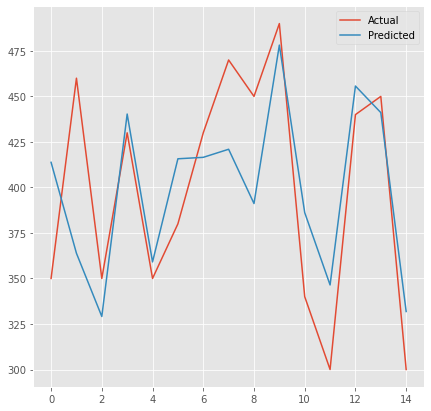

In [43]:
y_predict = regr.predict(x)
plt.plot(range(0,len(x)),y,label='Actual')
plt.plot(range(0,len(x)),y_predict,label='Predicted')
plt.legend()

In [53]:
print('Mean Absolute Error     : ', mean_absolute_error(y, y_predict))  
print('Mean Squared Error      : ', mean_squared_error(y, y_predict))  
print('R^2                     : ', r2_score(y, y_predict))

Mean Absolute Error     :  34.545673647693434
Mean Squared Error      :  1802.2204311503629
R^2                     :  0.5214779360292285


Berdasar hasil diatas dapat disimpulkan bahwa nilai Mean Absolute Error dan Mean Squared Error yang rendah.

### Linear Model with Statsmodel

In [45]:
x_constant = sm.add_constant(x) # adding a constant

model = sm.OLS(y,x_constant).fit()
predictions = model.predict(x_constant) 

In [46]:
x.head()

,price,advertising
0,5.5,3.3
1,7.5,3.3
2,8.0,3.0
3,8.0,4.5
4,6.8,3.0


In [47]:
x_constant.head()

,const,price,advertising
0,1.0,5.5,3.3
1,1.0,7.5,3.3
2,1.0,8.0,3.0
3,1.0,8.0,4.5
4,1.0,6.8,3.0


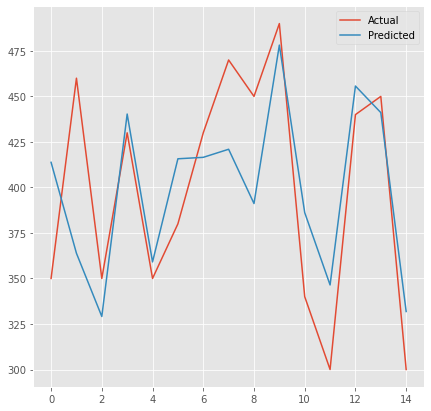

In [51]:
y_predict = model.predict(x_constant)
plt.plot(range(0,len(x)),y,label='Actual')
plt.plot(range(0,len(x)),y_predict,label='Predicted')
plt.legend()

In [52]:
print('Mean Absolute Error     : ', mean_absolute_error(y, y_predict))  
print('Mean Squared Error      : ', mean_squared_error(y, y_predict))  
print('R^2                     : ', r2_score(y, y_predict))

Mean Absolute Error     :  34.545673647693434
Mean Squared Error      :  1802.2204311503629
Root Mean Squared Error :  0.5214779360292285


In [50]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Sat, 24 Oct 2020   Prob (F-statistic):             0.0120
Time:                        19:09:56   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      

### Durbin Watson

Durbin-Watson digunakan untuk mendeteksi tidak terjadinya autokorelasi. Berdasarkan hasil diatas didapatkan informasi bahwa model memiliki nilai Durbin-Watson sebesar 1.683. Dengan variabel independen yang berjumlah 2 dan total keseluruhan data yaitu 15 baris, maka didapatkan dL = 0.95 dan dU = 1.54. Untuk mendeteksi tidak adanya auto korelasi nilai Durbin Watson harus ada di antara dL dan (4-dU).

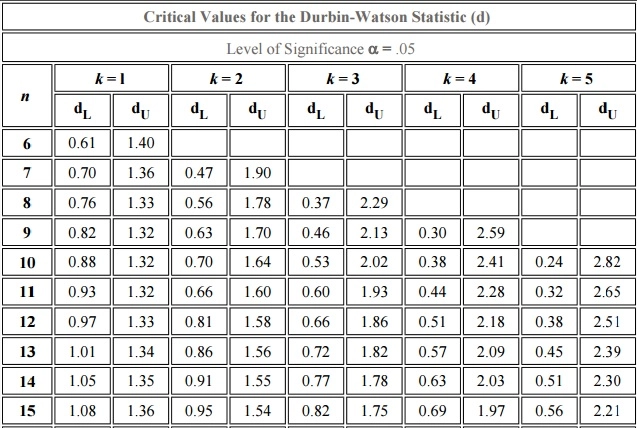

In [65]:
from IPython.display import Image
Image(filename='durbin-watson-table.png') 

In [56]:
print(f'0.95 < 1.683 < {4-1.54}' )

0.95 < 1.683 < 2.46


Karena nilai Durbin Watson ada diantara dL dan (4-dU) maka dapat diambil kesimpulan bahwa dalam model regresi linear diatas tidak terjadi autokorelasi

### F-Test / ANOVA

F-Test digunakan untuk melihat bagaimanakah pengaruh semua variabel bebasnya secara bersama-sama terhadap variabel terikatnya. Jika P-Value < 0.05 maka variabel memiliki pengaruh yang signifikan.

In [60]:
print(f'P-Value : {model.f_pvalue} ')

P-Value : 0.012006372233186378 


Berdasarkan informasi diatas nilai P-value yaitu 0.012 artinya kurang dari thresholdnya yaitu 0.05 maka disimpulkan bahwa variabel memiliki pengaruh yang signifikan.

### T-Test

T-Test dikenal dengan uji parsial, yaitu untuk menguji bagaimana pengaruh masing-masing variabel bebasnya secara sendiri-sendiri terhadap variabel terikatnya. Threshold dari T-Test sama seperti F-Test yaitu jika nilainya > 0.05 maka artinya variabel tersebut memiliki korelasi yang signifikan.

In [61]:
model.pvalues

const          0.019932
price          0.039788
advertising    0.014494
dtype: float64

Berdasarkan informasi diatas didapat nilai p dari price dan advertising kurang dari thresholdnya yaitu 0.05 maka disimpulkan bahwa variabel memiliki pengaruh yang signifikan.

### Kesimpulan

Dari hasil analisis diatas dapat dilihat bahwa nilai mae, mse, dan rmse yang cenderung rendah artinya model cukup baik. Juga dari hasil F-Test, T-Test, dan Durbin Watson dapat disimpulkan bahwa antar variabel memiliki pengaruh yang signifikan dan tidak terdapat autokorelasi.

Sumber : https://www.statistikian.com/2013/01/uji-f-dan-uji-t.html